In [1]:
# 画图和防止中文乱码、显示数量设置
# 画图工具
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',500)
pd.set_option('display.width',1000)
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties 
font_set = FontProperties(fname=r"C:\windows\fonts\MicroSoft YaHei.ttc", size=12)
# %matplotlib inline 
# auto 弹出窗口 inline 默认，在当前页显示
#指定默认字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.family']='sans-serif'
#解决负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

import math
import seaborn as sns
import warnings;warnings.filterwarnings(action='once')
import matplotlib as mpl
from ipywidgets import widgets,Button,Label

warnings.filterwarnings('ignore')

In [2]:
# 导入statesmodel包
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [ ]:
# Load data
dat = sm.datasets.get_rdataset("Guerry", "HistData").data

# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()

# Inspect the results
print(results.summary())

In [3]:
from patsy import dmatrices

In [7]:
 # df = sm.datasets.get_rdataset("Guerry", "HistData").data
'''
 要拟合 涵盖的大多数模型statsmodels，您需要创建两个设计矩阵。第一个是内生变量矩阵（即相关变量、响应变量、回归变量等）。
 第二个是外生变量矩阵（即独立变量、预测变量、回归变量等）
 '''
 # 显示所有的方法
 dir(sm)
 #函数和类：

from statsmodels.regression.linear_model import OLS, WLS
from statsmodels.tools.tools import add_constant

In [9]:
# OLS 普通最小二乘回归
spector_data = sm.datasets.spector.load()
spector_data.exog = sm.add_constant(spector_data.exog, prepend=False)
mod = sm.OLS(spector_data.endog, spector_data.exog)
res=mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     6.646
Date:                Tue, 12 Oct 2021   Prob (F-statistic):            0.00157
Time:                        10:05:41   Log-Likelihood:                -12.978
No. Observations:                  32   AIC:                             33.96
Df Residuals:                      28   BIC:                             39.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4639      0.162      2.864      0.0

In [ ]:
# 提取参数
res.params #回归系数
res.df_model


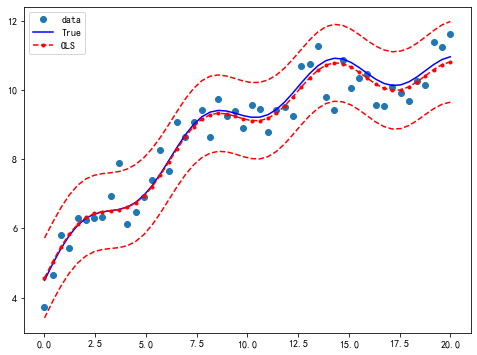

In [19]:
# 绘制置信区间图
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x - 5) ** 2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.0]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

res = sm.OLS(y, X).fit()
pred_ols = res.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, y, "o", label="data")
ax.plot(x, y_true, "b-", label="True")
ax.plot(x, res.fittedvalues, "r--.", label="OLS")
ax.plot(x, iv_u, "r--")
ax.plot(x, iv_l, "r--")
ax.legend(loc="best")
plt.show()

In [23]:
# 广义最小二乘  GLS 
data = sm.datasets.longley.load()
data.exog = sm.add_constant(data.exog)

# 获得残差
ols_resid = sm.OLS(data.endog, data.exog).fit().resid

In [24]:
resid_fit = sm.OLS(
    np.asarray(ols_resid)[1:], sm.add_constant(np.asarray(ols_resid)[:-1])
).fit()
print(resid_fit.tvalues[1])
print(resid_fit.pvalues[1])

-1.4390229839705615
0.17378444788898745


In [25]:
rho = resid_fit.params[1]
from scipy.linalg import toeplitz
toeplitz(range(5))

array([[0, 1, 2, 3, 4],
       [1, 0, 1, 2, 3],
       [2, 1, 0, 1, 2],
       [3, 2, 1, 0, 1],
       [4, 3, 2, 1, 0]])

In [26]:
order = toeplitz(range(len(ols_resid)))
sigma = rho ** order
gls_model = sm.GLS(data.endog, data.exog, sigma=sigma)
gls_results = gls_model.fit()
glsar_model = sm.GLSAR(data.endog, data.exog, 1)
glsar_results = glsar_model.iterative_fit(1)
print(glsar_results.summary())

                           GLSAR Regression Results                           
Dep. Variable:                      y   R-squared:                       0.996
Model:                          GLSAR   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     295.2
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           6.09e-09
Time:                        11:12:23   Log-Likelihood:                -102.04
No. Observations:                  15   AIC:                             218.1
Df Residuals:                       8   BIC:                             223.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.468e+06   8.72e+05     -3.979      0.0

In [28]:
# 分位数回归  quantile regression  QR
data = sm.datasets.engel.load_pandas().data
data.head()
mod = smf.quantreg("foodexp ~ income", data)
res = mod.fit(q=0.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                foodexp   Pseudo R-squared:               0.6206
Model:                       QuantReg   Bandwidth:                       64.51
Method:                 Least Squares   Sparsity:                        209.3
Date:                Tue, 12 Oct 2021   No. Observations:                  235
Time:                        13:07:38   Df Residuals:                      233
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     81.4823     14.634      5.568      0.000      52.649     110.315
income         0.5602      0.013     42.516      0.000       0.534       0.586

The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.


In [29]:
quantiles = np.arange(0.05, 0.96, 0.1)


def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params["Intercept"], res.params["income"]] + res.conf_int().loc[
        "income"
    ].tolist()


models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=["q", "a", "b", "lb", "ub"])

ols = smf.ols("foodexp ~ income", data).fit()
ols_ci = ols.conf_int().loc["income"].tolist()
ols = dict(
    a=ols.params["Intercept"], b=ols.params["income"], lb=ols_ci[0], ub=ols_ci[1]
)

print(models)
print(ols)

      q           a         b        lb        ub
0  0.05  124.880097  0.343361  0.268632  0.418090
1  0.15  111.693660  0.423708  0.382780  0.464636
2  0.25   95.483539  0.474103  0.439900  0.508306
3  0.35  105.841294  0.488901  0.457759  0.520043
4  0.45   81.083647  0.552428  0.525021  0.579835
5  0.55   89.661370  0.565601  0.540955  0.590247
6  0.65   74.033435  0.604576  0.582169  0.626982
7  0.75   62.396584  0.644014  0.622411  0.665617
8  0.85   52.272216  0.677603  0.657383  0.697823
9  0.95   64.103964  0.709069  0.687831  0.730306
{'a': 147.4753885237058, 'b': 0.4851784236769232, 'lb': 0.45687381301842295, 'ub': 0.5134830343354234}


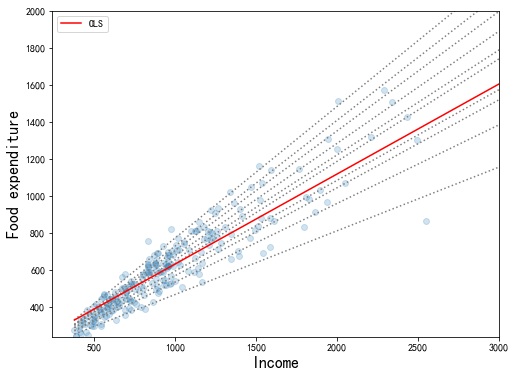

In [31]:
x = np.arange(data.income.min(), data.income.max(), 50)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle="dotted", color="grey")

y = get_y(ols["a"], ols["b"])

ax.plot(x, y, color="red", label="OLS")
ax.scatter(data.income, data.foodexp, alpha=0.2)
ax.set_xlim((240, 3000))
ax.set_ylim((240, 2000))
legend = ax.legend()
ax.set_xlabel("Income", fontsize=16)
ax.set_ylabel("Food expenditure", fontsize=16)
plt.show()

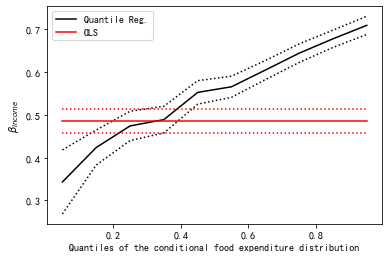

In [32]:
'''
黑色虚线围绕 10 个分位数回归估计（黑色实线）形成 95% 逐点置信带。红线代表 OLS 回归结果及其 95% 置信区间。

在大多数情况下，分位数回归点估计值位于 OLS 置信区间之外，这表明收入对食品支出的影响在整个分布中可能不是恒定的。
'''
n = models.shape[0]
p1 = plt.plot(models.q, models.b, color="black", label="Quantile Reg.")
p2 = plt.plot(models.q, models.ub, linestyle="dotted", color="black")
p3 = plt.plot(models.q, models.lb, linestyle="dotted", color="black")
p4 = plt.plot(models.q, [ols["b"]] * n, color="red", label="OLS")
p5 = plt.plot(models.q, [ols["lb"]] * n, linestyle="dotted", color="red")
p6 = plt.plot(models.q, [ols["ub"]] * n, linestyle="dotted", color="red")
plt.ylabel(r"$\beta_{income}$")
plt.xlabel("Quantiles of the conditional food expenditure distribution")
plt.legend()
plt.show()

In [33]:
# 递归最小二乘
''' 
货币数量理论表明，“货币数量变化率的给定变化会引起……价格通胀率的相同变化”（卢卡斯，1980 年）。
跟随卢卡斯，我们研究了货币增长的双边指数加权移动平均线与 CPI 通胀之间的关系。尽管 Lucas 发现这些变量之间的关系是稳定的，
但最近似乎这种关系不稳定；参见例如萨金特和苏里科 (2010)。
'''
from pandas_datareader import DataReader
start = "1959-12-01"
end = "2015-01-01"
m2 = DataReader("M2SL", "fred", start=start, end=end)
cpi = DataReader("CPIAUCSL", "fred", start=start, end=end)

In [36]:
def ewma(series, beta, n_window):
    nobs = len(series)
    scalar = (1 - beta) / (1 + beta)
    ma = []
    k = np.arange(n_window, 0, -1)
    weights = np.r_[beta ** k, 1, beta ** k[::-1]]
    for t in range(n_window, nobs - n_window):
        window = series.iloc[t - n_window : t + n_window + 1].values
        ma.append(scalar * np.sum(weights * window))
    return pd.Series(ma, name=series.name, index=series.iloc[n_window:-n_window].index)


m2_ewma = ewma(np.log(m2["M2SL"].resample("QS").mean()).diff().iloc[1:], 0.95, 10 * 4)
cpi_ewma = ewma(
    np.log(cpi["CPIAUCSL"].resample("QS").mean()).diff().iloc[1:], 0.95, 10 * 4
)

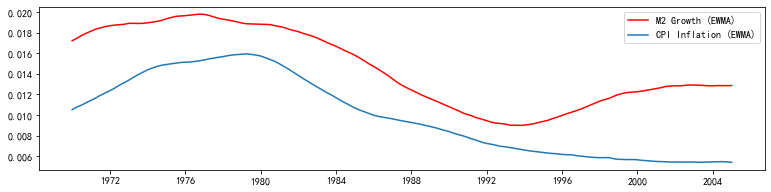

In [44]:
fig, ax = plt.subplots(figsize=(13, 3))

ax.plot(m2_ewma, label="M2 Growth (EWMA)",color='r',linestyle='solid')
ax.plot(cpi_ewma, label="CPI Inflation (EWMA)")
ax.legend()
plt.show()

In [45]:
endog = cpi_ewma
exog = sm.add_constant(m2_ewma)
exog.columns = ["const", "M2"]

mod = sm.RecursiveLS(endog, exog)
res = mod.fit()

print(res.summary())

                           Statespace Model Results                           
Dep. Variable:               CPIAUCSL   No. Observations:                  141
Model:                    RecursiveLS   Log Likelihood                 692.989
Date:                Tue, 12 Oct 2021   R-squared:                       0.814
Time:                        13:40:53   AIC                          -1381.978
Sample:                    01-01-1970   BIC                          -1376.080
                         - 01-01-2005   HQIC                         -1379.581
Covariance Type:            nonrobust   Scale                            0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0034      0.001     -6.017      0.000      -0.004      -0.002
M2             0.9128      0.037     24.626      0.000       0.840       0.985
Ljung-Box (Q):                     1865.19   Jarque-

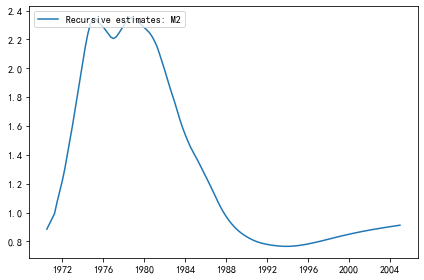

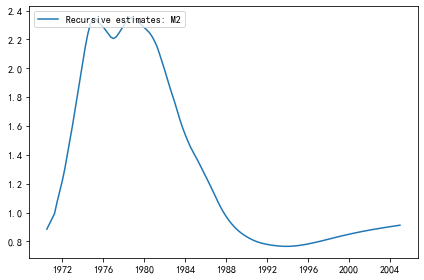

In [46]:
res.plot_recursive_coefficient(1, alpha=None)

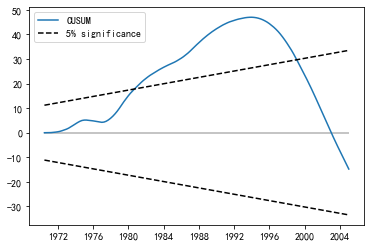

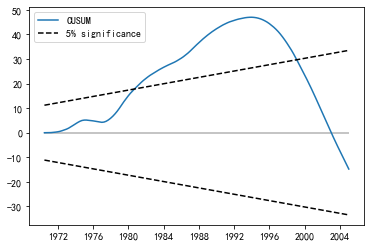

In [48]:
res.plot_cusum()

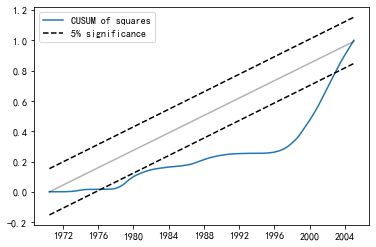

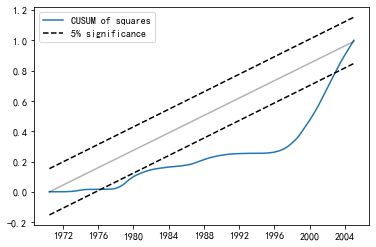

In [49]:
res.plot_cusum_squares()

In [62]:
# 时间序列 
#  导入包并设置格式
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc("figure", figsize=(16, 6))
sns.mpl.rc("font", size=14)


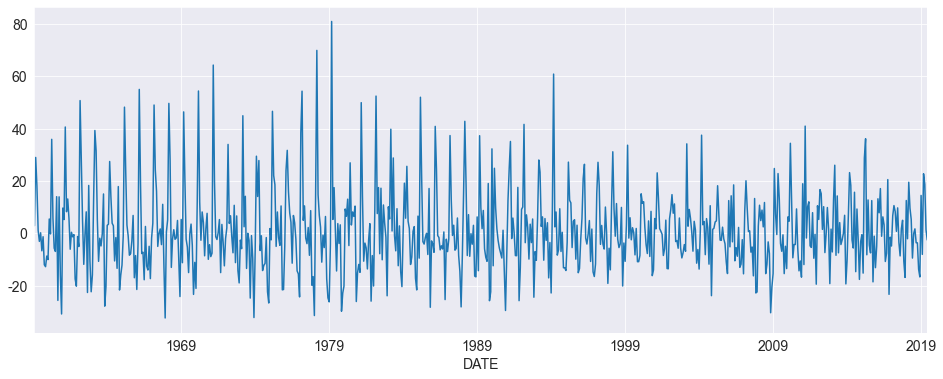

In [56]:
import pandas_datareader as pdr
data = pdr.get_data_fred("HOUSTNSA", "1959-01-01", "2019-06-01")
housing = data.HOUSTNSA.pct_change().dropna()
# Scale by 100 to get percentages
housing = 100 * housing.asfreq("MS")
fig, ax = plt.subplots()
ax = housing.plot(ax=ax)

In [69]:
mod = AutoReg(housing, 2,seasonal=True)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:               Seas. AutoReg(2)   Log Likelihood               -2652.556
Method:               Conditional MLE   S.D. of innovations              9.487
Date:                Tue, 12 Oct 2021   AIC                              4.541
Time:                        14:36:54   BIC                              4.636
Sample:                    04-01-1959   HQIC                             4.578
                         - 06-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       1.2726      1.373      0.927      0.354      -1.418       3.963
seasonal.1     32.6477      1.824     17.901      0.000      29.073      36.222
seasonal.2     23.0685      2.435      9.472    

In [67]:
res = mod.fit(cov_type='HC0')
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:                     AutoReg(2)   Log Likelihood               -3011.257
Method:               Conditional MLE   S.D. of innovations             15.580
Date:                Tue, 12 Oct 2021   AIC                              5.503
Time:                        14:33:38   BIC                              5.528
Sample:                    04-01-1959   HQIC                             5.513
                         - 06-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       0.9490      0.595      1.595      0.111      -0.217       2.115
HOUSTNSA.L1     0.1992      0.034      5.821      0.000       0.132       0.266
HOUSTNSA.L2    -0.0331      0.039     -0.846    

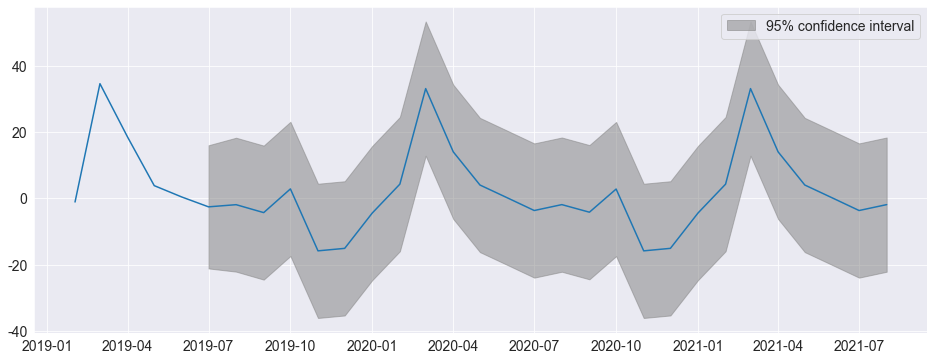

In [74]:
fig = res.plot_predict(720, 750)

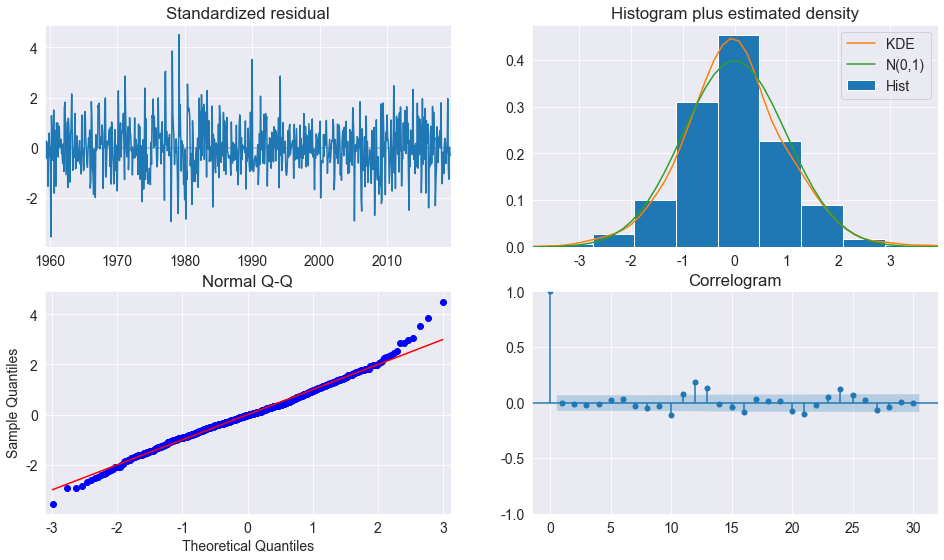

In [75]:
fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(fig=fig, lags=30)

In [79]:
# ARMA 模型
# 太阳黑子
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot
# print(sm.datasets.sunspots.NOTE)

<AxesSubplot:>

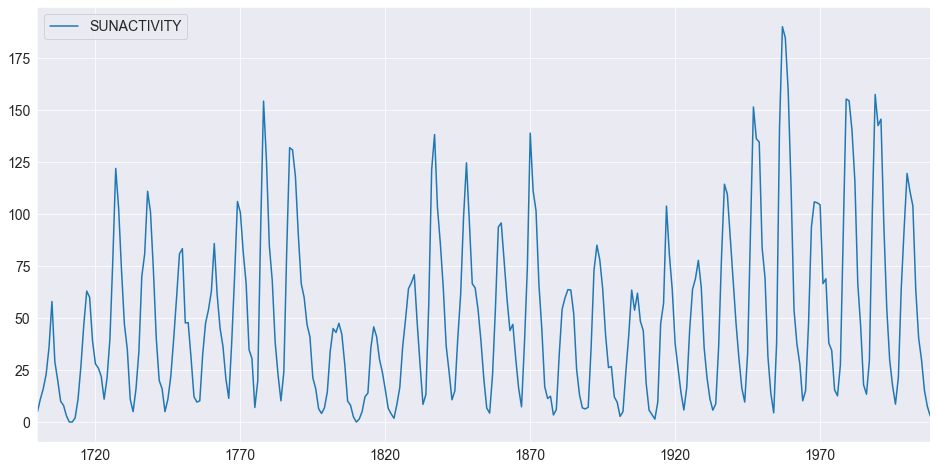

In [86]:
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range("1700", "2008"))
dta.index.freq = dta.index.inferred_freq
del dta["YEAR"]
dta.plot(figsize=(16,8))

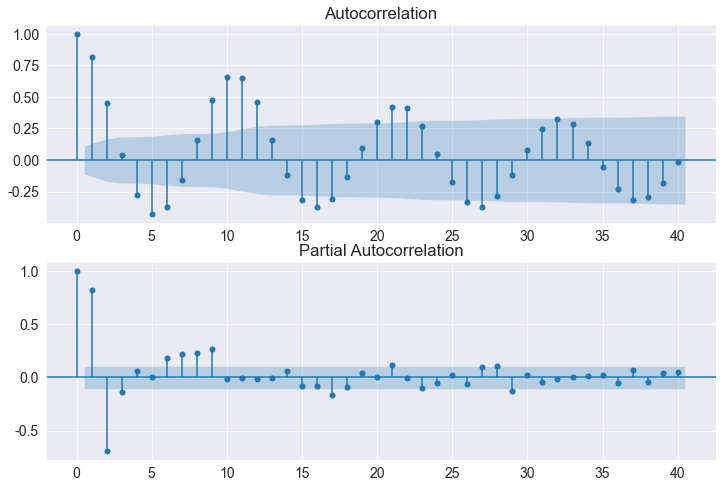

In [87]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1) # 从图上可以看出2阶之后的自相关系数为0
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

In [89]:
dta = sm.datasets.macrodata.load_pandas().data
index = pd.Index(sm.tsa.datetools.dates_from_range("1959Q1", "2009Q3"))
print(index)
dta.index = index
del dta["year"]
del dta["quarter"]

DatetimeIndex(['1959-03-31', '1959-06-30', '1959-09-30', '1959-12-31', '1960-03-31', '1960-06-30', '1960-09-30', '1960-12-31', '1961-03-31', '1961-06-30',
               ...
               '2007-06-30', '2007-09-30', '2007-12-31', '2008-03-31', '2008-06-30', '2008-09-30', '2008-12-31', '2009-03-31', '2009-06-30', '2009-09-30'], dtype='datetime64[ns]', length=203, freq=None)


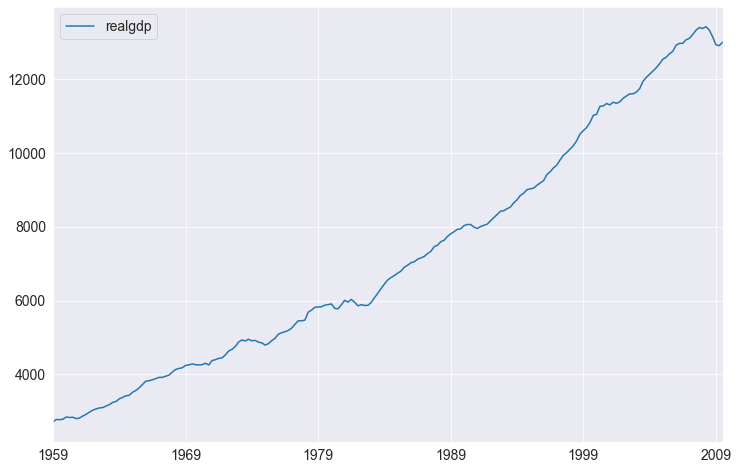

In [90]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
dta.realgdp.plot(ax=ax)
legend = ax.legend(loc="upper left")
legend.prop.set_size(20)

In [93]:
'''Hodrick-Prescott 过滤器分离时间序列 
 成趋势 
 和周期性成分 

通过最小化以下二次损失函数来确定组件
'''
 
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(dta.realgdp)
gdp_decomp = dta[["realgdp"]].copy()
gdp_decomp["cycle"] = gdp_cycle
gdp_decomp["trend"] = gdp_trend


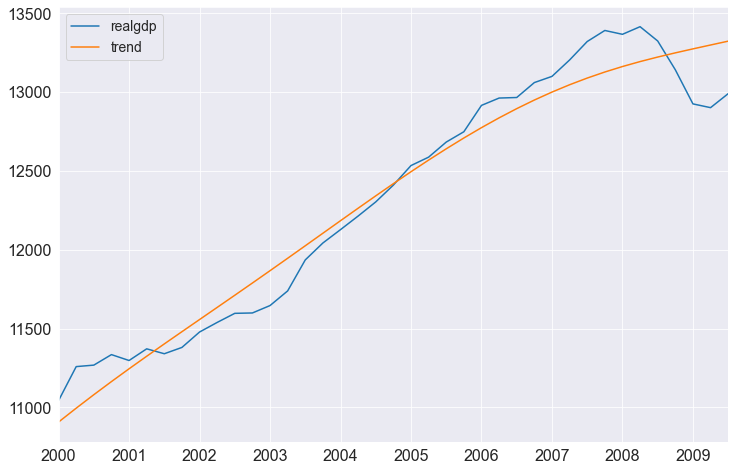

In [94]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
gdp_decomp[["realgdp", "trend"]]["2000-03-31":].plot(ax=ax, fontsize=16)
legend = ax.get_legend()
legend.prop.set_size(20)

<AxesSubplot:>

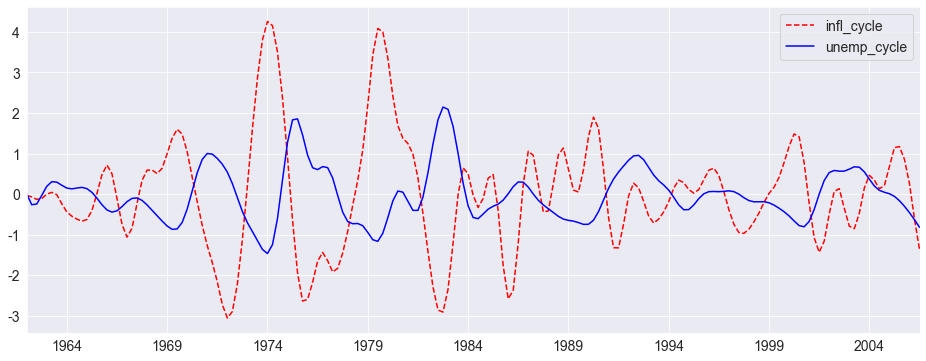

In [97]:
# Baxter-King 近似带通滤波器：通货膨胀和失业 ——探索通货膨胀和失业是反周期的假设
bk_cycles = sm.tsa.filters.bkfilter(dta[["infl", "unemp"]])
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(111)
bk_cycles.plot(ax=ax, style=["r--", "b-"])

In [99]:
# 统计数据
# 下载数据，并格式化
from urllib.request import urlopen
try:
    salary_table = pd.read_csv("salary.table")
except:  # recent pandas can read URL without urlopen
    url = "http://stats191.stanford.edu/data/salary.table"
    fh = urlopen(url)
    salary_table = pd.read_table(fh)
    salary_table.to_csv("salary.table")

E = salary_table.E
M = salary_table.M
X = salary_table.X
S = salary_table.S

Text(0, 0.5, 'Salary')

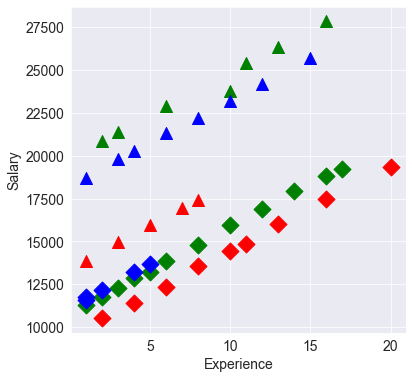

In [101]:
plt.figure(figsize=(6, 6))
symbols = ["D", "^"]
colors = ["r", "g", "blue"]
factor_groups = salary_table.groupby(["E", "M"])
for values, group in factor_groups:
    i, j = values
    plt.scatter(group["X"], group["S"], marker=symbols[j], color=colors[i - 1], s=144)
plt.xlabel("Experience")
plt.ylabel("Salary")